In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as tts
df = pd.read_csv('housing.csv')

In [7]:
df.head()
#Our 4 target features are: population, median income, median_house_value, total_rooms
#We now drop all other variables

df = df.drop(columns=['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'households', 'ocean_proximity'])

df.head()

,total_rooms,population,median_income,median_house_value
0,880.0,322.0,8.3252,452600.0
1,7099.0,2401.0,8.3014,358500.0
2,1467.0,496.0,7.2574,352100.0
3,1274.0,558.0,5.6431,341300.0
4,1627.0,565.0,3.8462,342200.0


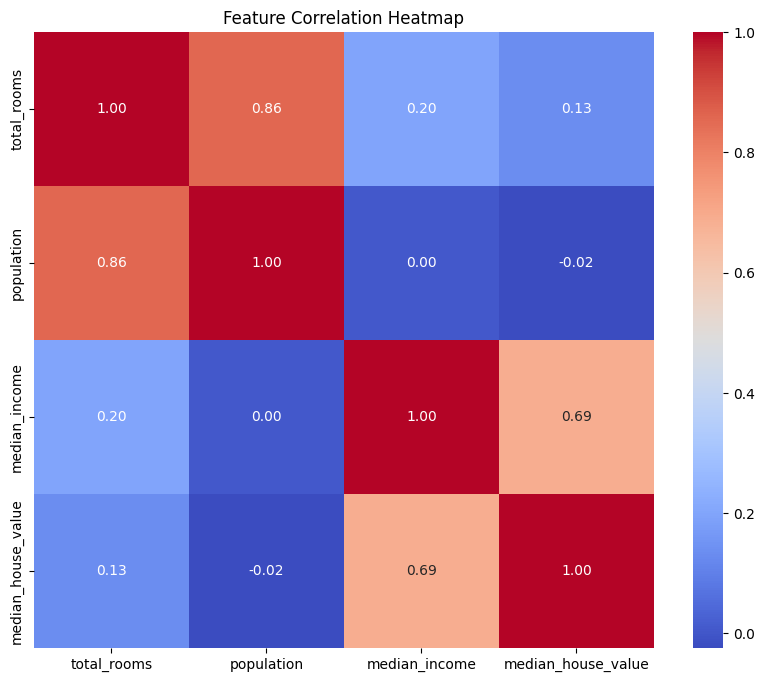

In [8]:
# Making a heat map to see which features are correlated
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()
#Based on this heatmap, we see that population and total_rooms are highly correlated, and median_income and median house value are roughly correlated.
#So similar to the class example of life satisfaction and GDP per cap, we will make a lin_reg model to predict median house value based on median income, and another lin_reg model to predict total rooms based on population.

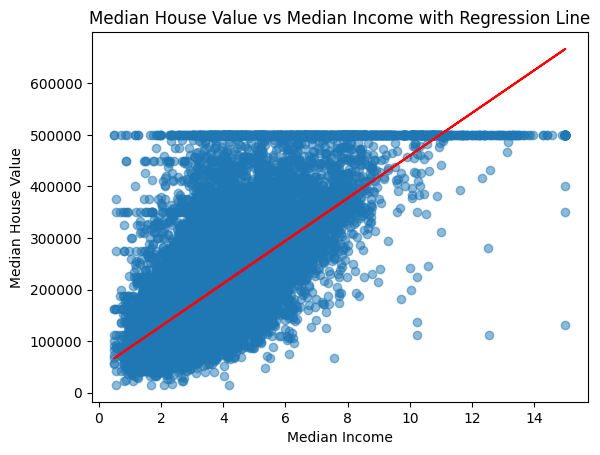

In [ ]:
#Split data into training and testing sets, first with median income and median house value
X = df[['median_income']]
y = df['median_house_value']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
m_model = LR()
m_model.fit(X_train, y_train)
m_model.score(X_test, y_test)

#Now we plot the regression line on top of the data
plt.scatter(X, y, alpha=0.5)
plt.plot(X, m_model.predict(X), color='red')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median House Value vs Median Income with Regression Line')
plt.show()

#We see that theres a lot of noise in the data , which is the my model is scoring so poorly.

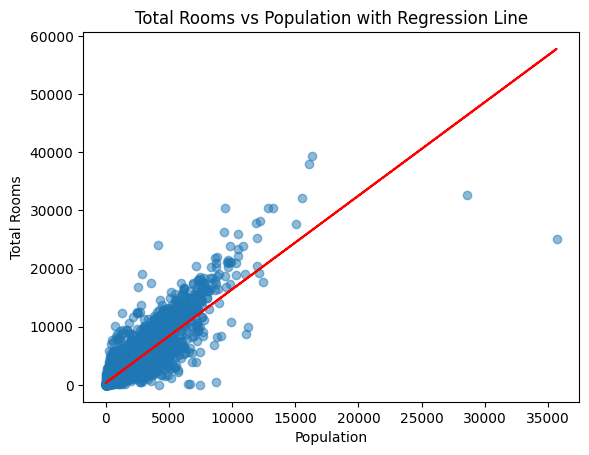

In [ ]:
#Same for population and total rooms
X = df[['population']]  
y = df['total_rooms']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
p_model = LR()
p_model.fit(X_train, y_train)
p_model.score(X_test, y_test)
#This model scores much better, likely because the correlation is stronger.
#Now we plot the regression line on top of the data
plt.scatter(X, y, alpha=0.5)
plt.plot(X, p_model.predict(X), color='red')
plt.xlabel('Population')
plt.ylabel('Total Rooms')
plt.title('Total Rooms vs Population with Regression Line')
plt.show()

#We see that if we removed the outliers, the model would likely score even better.


The main thing I took away from this homework was how much outliers and noise can affect the score of a model, in theory median income vs median house values should be fairly strongly correlated and
relatively easy to model, but when we plot the data we see that theres so much noise that it makes it difficult for a simple model to score accurately. 

References: Alot of the method and codes seen here is pulled from notes from my DATA 201 class taught by Proff Alam, which went over a lot of how to code these models. If needed I can submit that as well.